In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

<Axes: xlabel='Exited'>

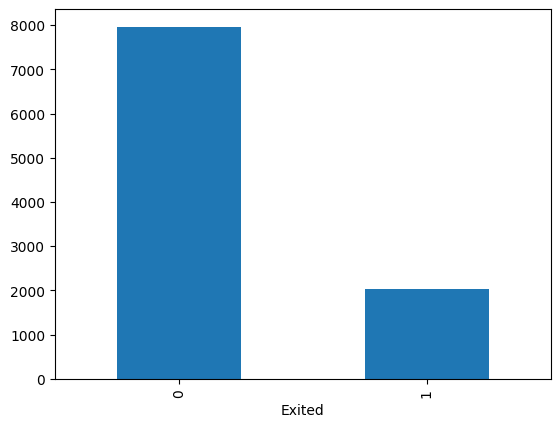

In [6]:
df['Exited'].value_counts().plot(kind='bar')

<Axes: xlabel='Geography'>

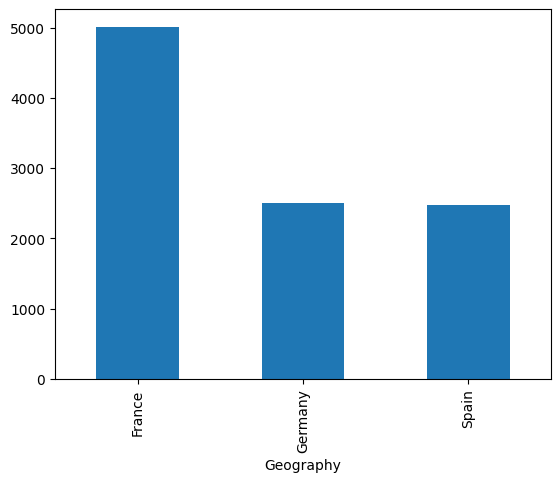

In [7]:
df['Geography'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

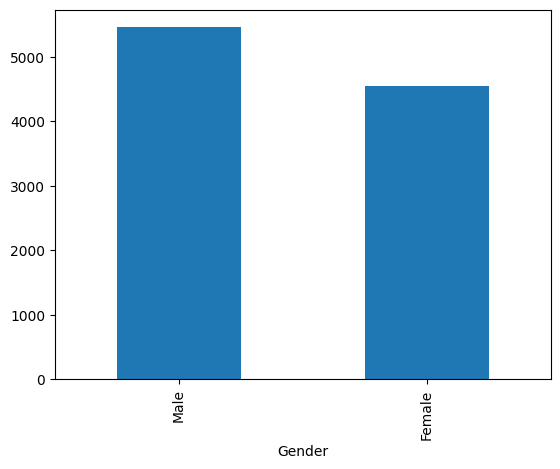

In [8]:
df['Gender'].value_counts().plot(kind='bar')

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [53]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3149 - accuracy: 0.8677 - val_loss: 0.3457 - val_accuracy: 0.8612
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3148 - accuracy: 0.8687 - val_loss: 0.3482 - val_accuracy: 0.8675
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3147 - accuracy: 0.8672 - val_loss: 0.3498 - val_accuracy: 0.8694
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3147 - accuracy: 0.8677 - val_loss: 0.3483 - val_accuracy: 0.8612
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3150 - accuracy: 0.8683 - val_loss: 0.3473 - val_accuracy: 0.8631
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3149 - accuracy: 0.8698 - val_loss: 0.3485 - val_accuracy: 0.8631
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3145 - accuracy: 0.8680 - val_loss: 0.3463 - val_accuracy: 0.8612

In [54]:
model.layers[0].get_weights()

[array([[ 1.23237461e-01,  2.56561160e-01,  6.55821860e-02,
          1.07811719e-01, -1.28295133e-03, -2.59938836e-01,
         -2.32810959e-01, -4.96359080e-01,  4.41668928e-01,
         -2.80231267e-01,  4.99897599e-02],
        [ 7.45409608e-01,  2.79201716e-01, -1.54813811e-01,
         -1.57399736e-02,  1.28091678e-01,  8.01854767e-03,
         -3.75886977e-01, -1.11243732e-01, -1.04362704e-01,
         -4.03356791e-01, -7.84989834e-01],
        [ 5.00072718e-01, -5.53084910e-02,  7.20384195e-02,
          1.21607639e-01,  1.36016548e-01, -2.63038296e-02,
         -7.85639361e-02,  1.72804102e-01,  1.90936908e-01,
         -4.50894177e-01,  2.33331285e-02],
        [-3.15404505e-01, -3.49625014e-02,  1.05773360e-01,
         -9.04006287e-02,  4.56207335e-01, -8.45993578e-01,
          4.27307218e-01,  4.31543678e-01, -6.64397717e-01,
          9.30021465e-01,  5.42962700e-02],
        [ 1.54781621e-03,  3.04834574e-01,  7.88245425e-02,
         -1.09442627e+00,  1.12377226e+00,  

In [55]:
model.layers[1].get_weights()

[array([[-1.50805026e-01, -8.24890435e-01,  1.46919757e-01,
          8.02428663e-01,  8.02408978e-02,  5.24221361e-01,
          7.37358630e-02,  3.41573055e-03,  6.80098832e-02,
          7.44040370e-01, -5.57921827e-01],
        [-1.23343095e-01, -1.31232649e-01, -8.40054393e-01,
          7.54363775e-01,  2.53803954e-02,  2.58992225e-01,
         -9.92178172e-03, -2.89950550e-01, -1.38307023e+00,
          8.00312579e-01,  7.99732149e-01],
        [-3.09464157e-01, -1.83836528e-04, -6.49173141e-01,
         -6.56798065e-01,  4.96156067e-01,  3.90602976e-01,
         -3.50580066e-01,  2.14470610e-01,  6.52736202e-02,
          3.74337256e-01, -8.07206750e-01],
        [ 7.90889740e-01, -3.96125764e-01,  3.98418866e-02,
         -6.84591904e-02,  9.40313116e-02, -6.76392466e-02,
          5.73226929e-01, -7.83833563e-01, -4.04266834e-01,
         -8.31755698e-02, -7.00306654e-01],
        [ 9.93609607e-01, -7.90536284e-01,  9.26091254e-01,
         -1.50239646e-01, -1.07863478e-01, -

In [56]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [57]:
y_pred = np.where(y_log>0.5,1,0)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8545

In [59]:
import matplotlib.pyplot as plt

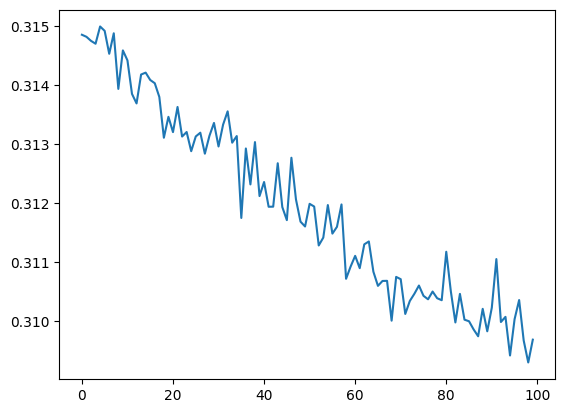

In [62]:
plt.plot(history.history['loss'])

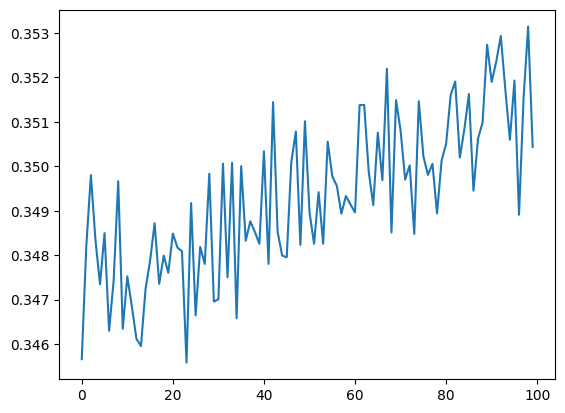

In [63]:
plt.plot(history.history['val_loss'])

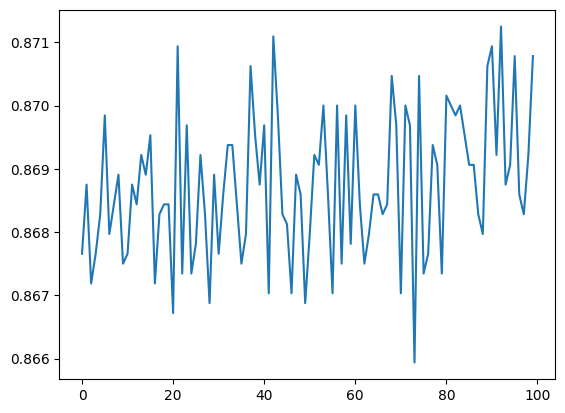

In [64]:
plt.plot(history.history['accuracy'])